# Group 4:
1. Hoàng Minh Tân
2. Cao Phương Nam
3. Đào Vũ Hoàng Nam

Chương này không chỉ bao gồm những phép kết hợp tồn tại trong Spark và cách sử dụng chúng, mà còn 
một số nội dung cơ bản để bạn có thể suy nghĩ về cách Spark thực sự thực hiện liên kết trên 
cụm. Kiến thức cơ bản này có thể giúp bạn tránh tràn bộ nhớ và giải quyết các vấn đề mà bạn không 
thể giải quyết trước đây.

# Join Expressions
Một phép kết hợp tập hợp hai bộ dữ liệu, bên trái và bên phải, bằng cách so sánh giá trị của một hoặc nhiều khóa bên trái và bên phải và đánh giá kết quả của một biểu thức liên kết để xác định liệu Spark có nên tập hợp tập dữ liệu bên trái với tập hợp dữ liệu bên phải hay không. Biểu thức liên kết phổ biến nhất, một phép liên kết tương đương, so sánh liệu các khóa được chỉ định trong tập dữ liệu bên trái và bên phải của bạn có bằng nhau hay không. Nếu chúng bằng nhau, Spark sẽ kết hợp các tập dữ liệu bên trái và bên phải. Điều ngược lại là đúng đối với các khóa không khớp; Spark loại bỏ các hàng không có khóa được liên kết. Spark cũng cho phép sử dụng các quy tắc liên kết mạnh hơn vào liên kết tương đương. Chúng ta thậm chí có thể sử dụng các kiểu phức tạp và thực hiện một cái gì đó như kiểm tra xem khóa có tồn tại trong một mảng hay không khi bạn thực hiện phép kết hợp.

# Join Types
Trong khi biểu thức liên kết quyết định xem hai hàng có nên nối hay không, thì kiểu kết hợp xác định những gì nên có trong tập kết quả. Có rất nhiều kiểu kết hợp khác nhau có sẵn trong Spark để bạn sử dụng:
1. Phép kết nội (giữ các hàng có khóa tồn tại trong tập dữ liệu bên trái và bên phải)
2. Phép kết ngoại (giữ các hàng có khóa trong tập dữ liệu bên trái hoặc bên phải)
3. Phép kết ngoại bên trái (giữ các hàng có khóa trong tập dữ liệu bên trái)
4. Phép kết ngoại bên phải (giữ các hàng có khóa trong tập dữ liệu bên phải)
5. Kết hợp bán bên trái (giữ các hàng ở bên trái và chỉ bên trái, tập dữ liệu nơi khóa xuất hiện trong tập dữ liệu bên phải)
6. Kết hợp trừ bên trái (giữ các hàng ở bên trái và chỉ ở bên trái, tập dữ liệu mà chúng không xuất hiện trong tập dữ liệu bên phải)
7. Phép hợp tự nhiên (thực hiện phép nối bằng cách khớp hoàn toàn các cột giữa hai tập dữ liệu có cùng tên)
8. Kết hợp chéo (hoặc Descartes) (khớp mọi hàng trong tập dữ liệu bên trái với mọi hàng trong tập dữ liệu bên phải)

Ví dụ một vài bộ dữ liệu đơn giản:

In [1]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

ModuleNotFoundError: No module named 'pyspark'

In [2]:
person = spark.createDataFrame([
(0, "Bill Chambers", 0, [100]),
(1, "Matei Zaharia", 1, [500, 250, 100]),
(2, "Michael Armbrust", 1, [250, 100])])\
.toDF("id", "name", "graduate_program", "spark_status")
graduateProgram = spark.createDataFrame([
(0, "Masters", "School of Information", "UC Berkeley"),
(2, "Masters", "EECS", "UC Berkeley"),
(1, "Ph.D.", "EECS", "UC Berkeley")])\
.toDF("id", "degree", "department", "school")
sparkStatus = spark.createDataFrame([
(500, "Vice President"),
(250, "PMC Member"),
(100, "Contributor")])\
.toDF("id", "status")

NameError: name 'spark' is not defined

Tiếp theo, tạo những bảng này để sử dụng chúng trong chapter này:

In [3]:
person.createOrReplaceTempView("person")
graduateProgram.createOrReplaceTempView("graduateProgram")
sparkStatus.createOrReplaceTempView("sparkStatus")

NameError: name 'person' is not defined

# Inner Joins (Phép kết nội)
Phép kết nội đánh giá các khóa ở cả DataFrames hay các bảng và chỉ bao gồm các hàng được đánh giá là 'true'. Ví dụ dưới đây, chúng ta hợp graduateProgram DataFrames với peron DataFrames để tạo ra một DataFrames mới:

In [4]:
joinExpression = person["graduate_program"] == graduateProgram['id']

NameError: name 'person' is not defined

Keys that do not exist in both DataFrames will not show in the resulting DataFrame. For
example, the following expression would result in zero values in the resulting DataFrame:
Những khóa mà không tồn tại ở cả 2 DataFrames sẽ không xuất hiện ở DataFrames kết quả. Ví dụ, biểu thức dưới đây sẽ không trả về kết quả nào ở DataFrames kết quả

In [5]:
wrongJoinExpression = person["name"] == graduateProgram["school"]

NameError: name 'person' is not defined

Phép kết nội là phép hợp mặc định, vì vậy chúng ta chỉ cần xác định DataFrame bên trái và bên phải rồi sử dụng từ khóa JOIN:

In [6]:
person.join(graduateProgram, joinExpression).show()
#-- in SQL
#SELECT * FROM person JOIN graduateProgram
#ON person.graduate_program = graduateProgram.id

NameError: name 'person' is not defined

Chúng ta cũng có thể xác định rõ ràng điều này bằng cách cho thêm vào một biến thứ 3 là joinType:

In [7]:
joinType = "inner"
person.join(graduateProgram, joinExpression, joinType).show()
#-- in SQL
#SELECT * FROM person INNER JOIN graduateProgram
#ON person.graduate_program = graduateProgram.id

NameError: name 'person' is not defined

# Outer Joins (Phép kết ngoại)
Phép kết ngoại đánh giá các khóa ở cả các DataFrames hay bảng và bao gồm các hàng được đánh giá là true hoặc false. Nếu không có hàng nào tương đương ở cả DataFrame trái và phải, Spark sẽ chèn giá trị null:

In [8]:
joinType = "outer"
person.join(graduateProgram, joinExpression, joinType).show()
# graduateProgram.join(person, joinExpression, joinType).show()
#-- in SQL
#SELECT * FROM person FULL OUTER JOIN graduateProgram
#ON graduate_program = graduateProgram.id

NameError: name 'person' is not defined

# Left Outer Joins (Phép kết ngoại bên trái)
Phép kết ngoại bên trái đánh giá các khóa ở các DataFrames và tất cả các hàng từ DataFrame bên trái. Nếu không có hàng nào tương đương ở DataFrame bên phải, Spark sẽ chèn giá trị null:

In [9]:
joinType = "left_outer"
graduateProgram.join(person, joinExpression, joinType).show()
#-- in SQL
#SELECT * FROM graduateProgram LEFT OUTER JOIN person
#ON person.graduate_program = graduateProgram.id

NameError: name 'graduateProgram' is not defined

# Right Outer Joins (Phép kết ngoại bên phải)
Phép kết ngoại bên trái đánh giá các khóa ở các DataFrames và tất cả các hàng từ DataFrame bên phải. Nếu không có hàng nào tương đương ở DataFrame bên trái, Spark sẽ chèn giá trị null:

In [10]:
joinType = "right_outer"
person.join(graduateProgram, joinExpression, joinType).show()
#-- in SQL
#SELECT * FROM person RIGHT OUTER JOIN graduateProgram
#ON person.graduate_program = graduateProgram.id

NameError: name 'person' is not defined

# Left Semi Joins (Phép hợp bán bên trái)
Phép bán hợp hơi khác một chút so với các phép hợp khác. Chúng thực sự không bao gồm bất kỳ giá trị nào từ DataFrame bên phải. Chúng chỉ so sánh các giá trị để xem liệu giá trị có tồn tại trong DataFrame thứ hai hay không. Nếu giá trị tồn tại, các hàng đó sẽ được giữ trong kết quả, ngay cả khi có các khóa trùng lặp trong DataFrame bên trái. Hãy nghĩ về các phép hợp bán bên trái như bộ lọc trên DataFrame, trái ngược với chức năng của một phép hợp thông thường:

In [11]:
joinType = "left_semi"
graduateProgram.join(person, joinExpression, joinType).show()

NameError: name 'graduateProgram' is not defined

In [12]:
gradProgram2 = graduateProgram.union(spark.createDataFrame([
(0, "Masters", "Duplicated Row", "Duplicated School")]))
gradProgram2.createOrReplaceTempView("gradProgram2")
gradProgram2.join(person, joinExpression, joinType).show()
#-- in SQL
#SELECT * FROM gradProgram2 LEFT SEMI JOIN person
#ON gradProgram2.id = person.graduate_program

NameError: name 'graduateProgram' is not defined

# Left Anti Joins (Phép hợp trừ bên trái)
Các phép hợp ngoại trừ trái ngược với phép hợp bán trái. Giống như các phép hợp bán bên trái, chúng không thực sự bao gồm bất kỳ giá trị nào từ DataFrame bên phải. Chúng chỉ so sánh các giá trị để xem liệu giá trị có tồn tại trong DataFrame thứ hai hay không. Tuy nhiên, thay vì giữ các giá trị tồn tại trong DataFrame thứ hai, chúng chỉ giữ các giá trị không có khóa tương ứng trong DataFrame thứ hai. Hãy nghĩ về các phép hợp ngoại trừ như một bộ lọc kiểu NOT IN SQL:

In [13]:
joinType = "left_anti"
graduateProgram.join(person, joinExpression, joinType).show()
#-- in SQL
#SELECT * FROM graduateProgram LEFT ANTI JOIN person
#ON graduateProgram.id = person.graduate_program

NameError: name 'graduateProgram' is not defined

# Natural Joins (Phép hợp tự nhiên)
Các phép hợp tự nhiên đưa ra các phỏng đoán ngầm tại các cột mà bạn muốn kết hợp. Nó tìm các cột phù hợp và trả về kết quả. Các phép hợp tự nhiên bên trái, bên phải và bên ngoài đều được hỗ trợ.

## WARNING
Ngầm luôn luôn nguy hiểm! Truy vấn sau sẽ cho chúng ta kết quả không chính xác vì hai DataFrames / bảng dùng chung tên cột (id), nhưng nó có nghĩa là những thứ khác nhau trong tập dữ liệu. Bạn nên luôn luôn sử dụng kết hợp này một cách thận trọng.
# Cross (Cartesian) Joins (Phép hợp chéo)
Phợp hợp sau cùng của chúng ta là phép hợp chéo hay sản phẩm Cartesian. Các phép hợp chéo trong các thuật ngữ đơn giản nhất là các phép hợp bên trong không chỉ định một thuộc tính nào. Các phép hợp chéo sẽ nối mọi hàng đơn lẻ trong DataFrame bên trái thành từng hàng đơn lẻ trong DataFrame bên phải. Điều này sẽ gây ra sự bùng nổ về số lượng hàng có trong DataFrame kết quả. Nếu bạn có 1.000 hàng trong mỗi DataFrame, sự kết hợp chéo trong số này sẽ dẫn đến 1.000.000 (1.000 x 1.000) hàng. Vì lý do này, bạn phải trình bày rõ ràng rằng bạn muốn kết hợp chéo bằng cách sử dụng từ khóa kết hợp chéo:

In [14]:
joinType = "cross"
graduateProgram.join(person, joinExpression, joinType).show()
#-- in SQL
#SELECT * FROM graduateProgram CROSS JOIN person
#ON graduateProgram.id = person.graduate_program

NameError: name 'graduateProgram' is not defined

Nếu bạn thực sự có ý định thực hiện kết hợp chéo, bạn có thể làm một cách rõ ràng như sau:

In [15]:
person.crossJoin(graduateProgram).show()
#-- in SQL
#SELECT * FROM graduateProgram CROSS JOIN person

NameError: name 'person' is not defined

## WARNING
Bạn chỉ nên sử dụng kết hợp chéo nếu bạn hoàn toàn chắc chắn 100% rằng đây là phép hợp bạn cần. Có một lý do tại sao bạn cần phải rõ ràng khi xác định kết hợp chéo trong Spark. Chúng rất nguy hiểm! Người dùng nâng cao có thể đặt cấu hình cấp độ phiên spark.sql.crossJoin.enable thành true để cho phép kết hợp chéo mà không có cảnh báo hoặc không cần Spark cố gắng thực hiện một phép kết hợp khác cho bạn.

# Challenges When Using Joins
Khi thực hiện phép hợp, có một số thách thức cụ thể và một số câu hỏi phổ biến phát sinh. Phần còn lại của chương sẽ cung cấp câu trả lời cho những câu hỏi phổ biến này và sau đó giải thích cách Spark thực hiện các phép hợp ở cấp độ cao. Điều này sẽ gợi ý về một số cách tối ưu hóa mà chúng tôi sẽ đề cập trong các phần sau của cuốn sách này.
## Joins on Complex Types
Mặc dù điều này có thể như là một trở ngại hoặc không. Mọi biểu thức là biểu thức kết hợp hợp lệ chỉ cần chúng trả về kết quả kiểu Boolean:

In [16]:
from pyspark.sql.functions import expr
person.withColumnRenamed("id", "personId")\
.join(sparkStatus, expr("array_contains(spark_status, id)")).show()
#-- in SQL
#SELECT * FROM
#(select id as personId, name, graduate_program, spark_status FROM person)
#INNER JOIN sparkStatus ON array_contains(spark_status, id)

ModuleNotFoundError: No module named 'pyspark'

## Handling Duplicate Column Names (Xử lý việc trùng tên cột)
Một trong những điều khó khăn xảy ra khi kết hợp là xử lý các tên cột trùng lặp trong DataFrame kết quả của bạn. Trong DataFrame, mỗi cột có một ID duy nhất trong Spark’s SQL Engine, Catalyst. ID duy nhất này hoàn toàn là nội bộ và không phải là thứ mà bạn có thể tham khảo trực tiếp. Điều này làm cho việc tham chiếu đến một cột cụ thể khá khó khăn khi bạn có DataFrame có tên cột trùng lặp.

Điều này có thể xảy ra trong 2 tình huống cụ thể sau:

1. Biểu thức hợp mà bạn chỉ định không xóa một khóa khỏi một trong các đầu vào
DataFrames và các khóa có cùng tên cột
2. Hai cột mà bạn không thực hiện phép hợp có cùng tên

Tạo các bộ dữ liệu có vấn đề để chúng ta có thể sử dụng để minh họa những vấn đề này:

In [17]:
gradProgramDupe = graduateProgram.withColumnRenamed("id", "graduate_program")
joinExpr = gradProgramDupe["graduate_program"] == person["graduate_program"]

NameError: name 'graduateProgram' is not defined

Lưu ý rằng có 2 cột graduate_program, mặc dù chúng ta đã kết hợp vào khóa đó:

In [18]:
person.join(gradProgramDupe, joinExpr).show()

NameError: name 'person' is not defined

Trở ngại phát sinh khi chúng ta tham chiếu 1 trong các cột này:

In [19]:
person.join(gradProgramDupe, joinExpr).select("graduate_program").show()

NameError: name 'person' is not defined

## Approach 1: Different join expression (Biểu thức kết hợp khác)
Khi bạn có 2 khóa cùng tên, có lẽ cách sửa đơn giản nhất là đổi đầu ra của biểu thức kết hợp từ Boolean thành String. Điều này sẽ tự động loại bỏ một cột cho bạn trong quá trình kết hợp:

In [20]:
person.join(gradProgramDupe,"graduate_program").select("graduate_program").show()

NameError: name 'person' is not defined

## Approach 2: Dropping the column after the join (Xóa cột sau khi kết hợp)
Một cách tiếp cận khác là xóa cột không phù hợp đi sau khi kết hợp. Khi làm vậy, chúng ta cần tham chiếu tới cột này thông qua DataFrames ban đầu. Chúng ta có thể làm vậy nếu phép hợp sử dụng cùng tên khóa hoặc nếu DataFrames gốc có các cột cùng tên:

In [21]:
person.join(gradProgramDupe, joinExpr).drop(person["graduate_program"]).select("graduate_program").show()

NameError: name 'person' is not defined

## Approach 3: Renaming a column before the join (Đổi tên cột trước khi kết hợp)
Chúng ta có thể hoàn toàn tránh vấn đề này nếu như đổi tên một trong các cột đó trước khi thực hiện phép hợp:

In [22]:
gradProgram3 = graduateProgram.withColumnRenamed("id", "grad_id")
joinExpr = person["graduate_program"] == gradProgram3["grad_id"]
person.join(gradProgram3, joinExpr).show()

NameError: name 'graduateProgram' is not defined

# Spark thực hiện các phép hợp như thế nào:
Để hiểu làm thế nào Spark thực hiện các phép hợp, bạn cần hiểu 2 tài liệu chính:
chiến lược giao tiếp node-to-node và per-node. Những vấn đề nội bộ này có vẻ không liên quan đến nghiệp vụ vấn đề của bạn. Tuy nhiên, bao hàm làm thế nào Spark thực hiện phép hợp có thể có nghĩa là sự khác nhau giữa một việc thực hiện một cách nhanh chóng và một việc không bao giờ hoàn thành.
## Communication Strategies (Chiến lược giao tiếp)
Spark tiếp cận giao tiếp cụm theo hai cách khác nhau trong quá trình kết hợp. Nó có thể bao gồm một kết hợp xáo trộn, dẫn đến một giao tiếp tất cả cho tất cả hoặc broadcast.

Nền tảng cốt lõi của quan điểm đơn giản hóa của chúng tôi về phép hợp là trong Spark, bạn sẽ có một bảng lớn hoặc một bảng nhỏ. Mặc dù đây rõ ràng là một phổ (và mọi thứ sẽ xảy ra khác nếu bạn có một "bảng cỡ trung bình"), nhưng nó có thể giúp phân biệt được 2 phần vì lợi ích của giải thích này.

### Big table–to–big table
Khi bạn kết hợp một bảng lớn và một bảng lớn khác, bạn sẽ thực hiện shuffle join, ví dụ như minh họa trong Figure 8-1.
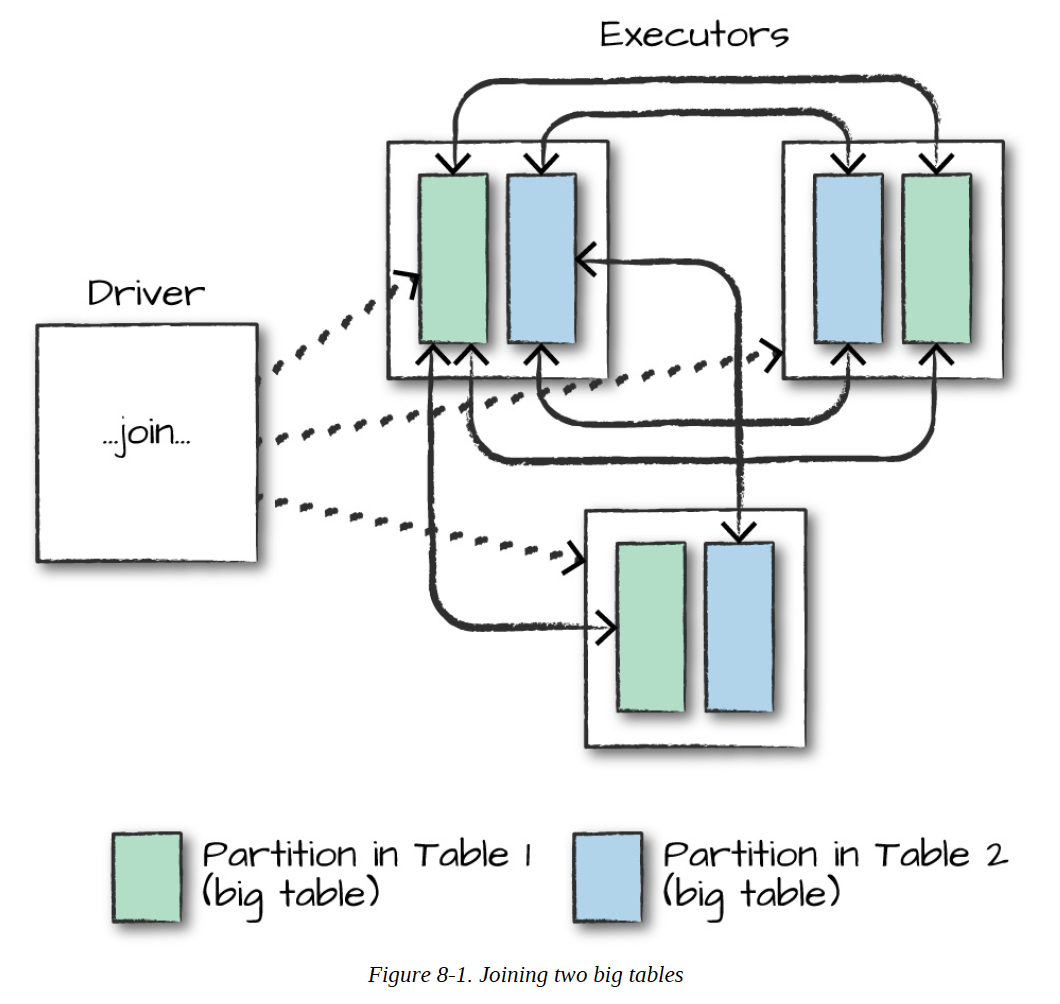
Trong một phép kết hợp xáo trộn, mỗi nút nói chuyện với mọi nút khác và chúng chia sẻ dữ liệu theo đó nút nào có một khóa hoặc bộ khóa nhất định (mà bạn đang kết hợp). Những lần kết hợp này rất tốn kém vì mạng có thể bị tắc nghẽn do lưu lượng truy cập, đặc biệt nếu dữ liệu của bạn không được phân vùng tốt.

### Big table–to–small table
Khi bảng đủ nhỏ để vừa với bộ nhớ của một nút làm việc, tất nhiên, với một số không gian nghỉ, chúng ta có thể tối ưu hóa phép hợp của mình. Mặc dù chúng ta có thể sử dụng chiến lược truyền thông từ bảng lớn đến bảng lớn, nhưng thường có thể hiệu quả hơn khi sử dụng phép hợp quảng bá. Điều này có nghĩa là chúng tôi sẽ sao chép DataFrame nhỏ của chúng tôi lên mọi nút làm việc trong cụm (có thể là nằm trên một hoặc nhiều máy). Bây giờ điều này nghe có vẻ tốn kém. Tuy nhiên, điều này ngăn chúng tôi thực hiện giao tiếp tất cả với tất cả trong toàn bộ quá trình hợp. Thay vào đó, chúng tôi thực hiện nó chỉ một lần khi bắt đầu và sau đó để từng nút worker riêng lẻ thực hiện công việc mà không cần phải đợi hoặc giao tiếp với bất kỳ nút worker nào khác, như được mô tả trong Hình 8-2.
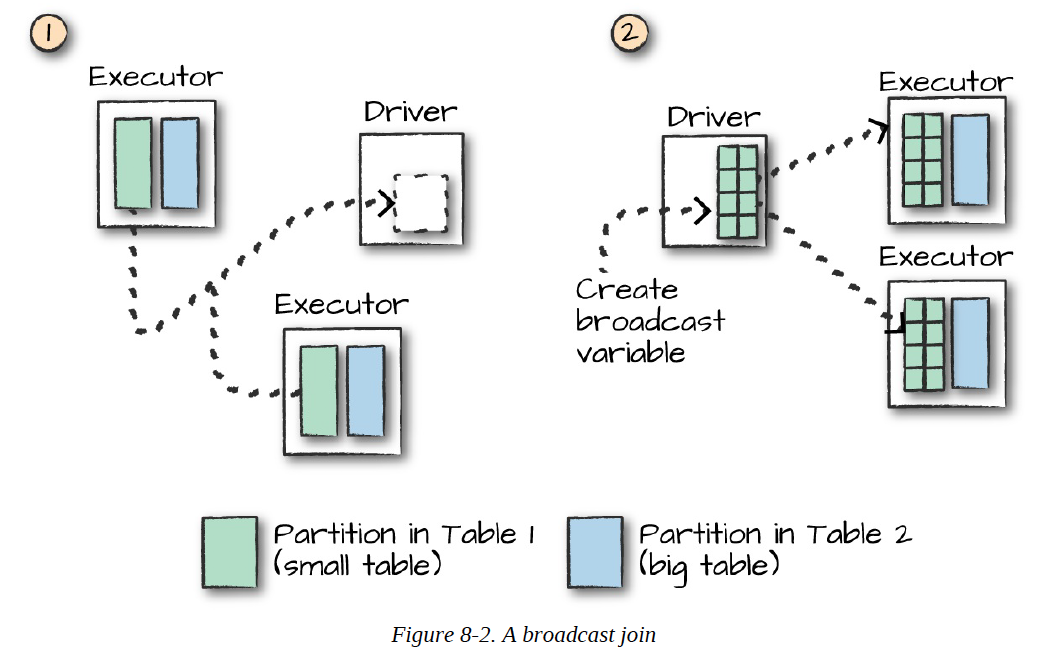
Khi bắt đầu phép hợp này sẽ là một giao tiếp lớn, giống như trong loại hợp trước. Tuy nhiên, ngay sau đó lần đầu tiên, sẽ không có giao tiếp nào giữa các nút nữa.
Điều này có nghĩa là các phép hợp sẽ được thực hiện trên từng nút riêng lẻ, khiến CPU trở thành nút cổ chai lớn nhất. Đối với tập dữ liệu hiện tại của chúng tôi, chúng tôi có thể thấy rằng Spark đã tự động thiết lập điều này làm kết hợp quảng bá bằng cách xem kế hoạch giải thích:

In [23]:
joinExpr = person["graduate_program"] == graduateProgram["id"]
person.join(graduateProgram, joinExpr).explain()

NameError: name 'person' is not defined

Với API DataFrame, chúng tôi cũng có thể đưa ra gợi ý rõ ràng cho trình tối ưu hóa rằng chúng tôi muốn sử dụng một phép hợp quảng bá bằng cách sử dụng đúng hàm xung quanh DataFrame nhỏ được đề cập. Trong ví dụ này, những kết quả này dẫn đến cùng một kế hoạch mà chúng ta vừa thấy; Tuy nhiên, đây không phải là luôn luôn như vậy:

In [24]:
from pyspark.sql.functions import broadcast
joinExpr = person["graduate_program"] == graduateProgram["id"]
person.join(broadcast(graduateProgram), joinExpr).explain()

ModuleNotFoundError: No module named 'pyspark'

Giao diện SQL cũng bao gồm khả năng cung cấp các gợi ý để thực hiện các phép hợp. Tuy nhiên, những điều này không được thực thi, vì vậy trình tối ưu hóa có thể chọn bỏ qua chúng. Bạn có thể đặt một trong những gợi ý này bằng cách sử dụng cú pháp nhận xét đặc biệt. MAPJOIN, BROADCAST và BROADCASTJOIN đều hoạt động tương tự và tất cả đều được hỗ trợ:

In [25]:
#-- in SQL
#SELECT /*+ MAPJOIN(graduateProgram) */ * FROM person JOIN graduateProgram
#ON person.graduate_program = graduateProgram.id

### Little table–to–little table
Khi thực hiện liên kết với các bảng nhỏ, tốt nhất là để Spark quyết định cách tham gia chúng. Bạn luôn có thể buộc broadcast join nếu bạn nhận thấy hành vi lạ.
# Conclusion
Trong chương này, chúng ta đã thảo luận về phép hợp, có lẽ là một trong những trường hợp sử dụng phổ biến nhất. Một điều chúng tôi không đề cập đến nhưng điều quan trọng cần xem xét là nếu bạn phân vùng dữ liệu của mình một cách chính xác trước khi tham gia, bạn có thể thực hiện hiệu quả hơn nhiều vì ngay cả khi có kế hoạch xáo trộn, nếu dữ liệu từ hai DataFrames khác nhau đã được đặt trên cùng một máy, Spark có thể tránh được sự xáo trộn. Thử nghiệm với một số dữ liệu của bạn và thử phân vùng trước để xem liệu bạn có thể nhận thấy sự gia tăng tốc độ khi thực hiện các phép nối đó hay không. Trong Chương 9, chúng ta sẽ thảo luận về các API nguồn dữ liệu của Spark. Có những tác động bổ sung khi bạn quyết định thứ tự nối sẽ xảy ra. Bởi vì một số liên kết hoạt động như bộ lọc, đây có thể là một cải tiến thấp trong khối lượng công việc của bạn, vì bạn được đảm bảo giảm dữ liệu trao đổi qua mạng.

Chương tiếp theo sẽ bắt đầu từ thao tác của người dùng, như chúng ta đã thấy trong một số chương trước và đề cập đến việc đọc và ghi dữ liệu bằng cách sử dụng các API có cấu trúc.